# Practice Day 1. Regression

### Load File

In [1]:
file = open('../data/regression_data.txt','r')  # open the file with read-only
text = file.readlines()  # read all line texts
file.close()  # close the file

x_data = []
y_data = []

# convert to float
for s in text:
    data = s.split()
    x_data.append(float(data[0]))
    y_data.append(float(data[1]))    

### Plot data

<IPython.core.display.Javascript object>


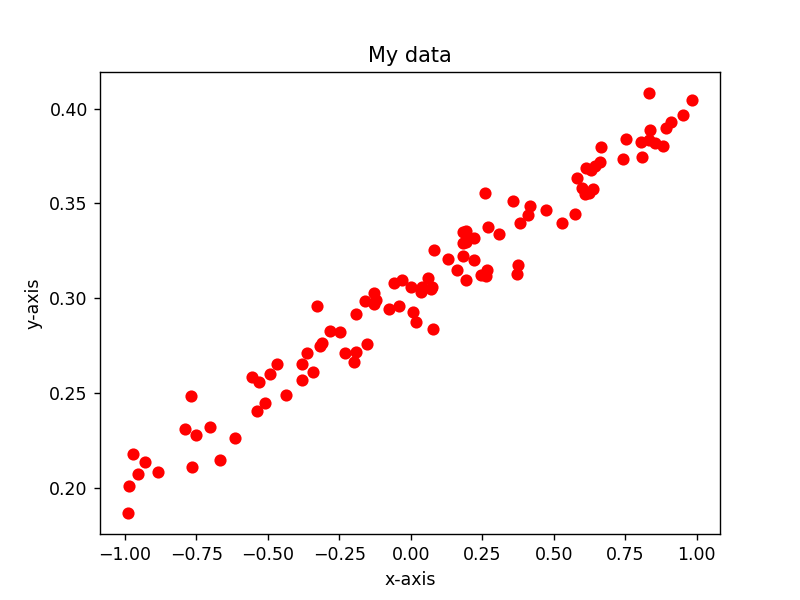

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

plt.figure(1)
plt.plot(x_data, y_data, 'ro') # plot data

plt.xlabel('x-axis')  
plt.ylabel('y-axis')
plt.title('My data')

plt.show()

### Closed Form Linear Regression

In [11]:
# convert to numpy-array
x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

N = len(x_data) # the size of data

sum_of_x =
sum_of_x_square = 
sum_of_y = 
sum_of_xy = 

a = 
b = 

print ('a : {}'.format(a))
print ('b : {}'.format(b))

a : 0.09899380848051839
b : 0.3020929765082997


<IPython.core.display.Javascript object>


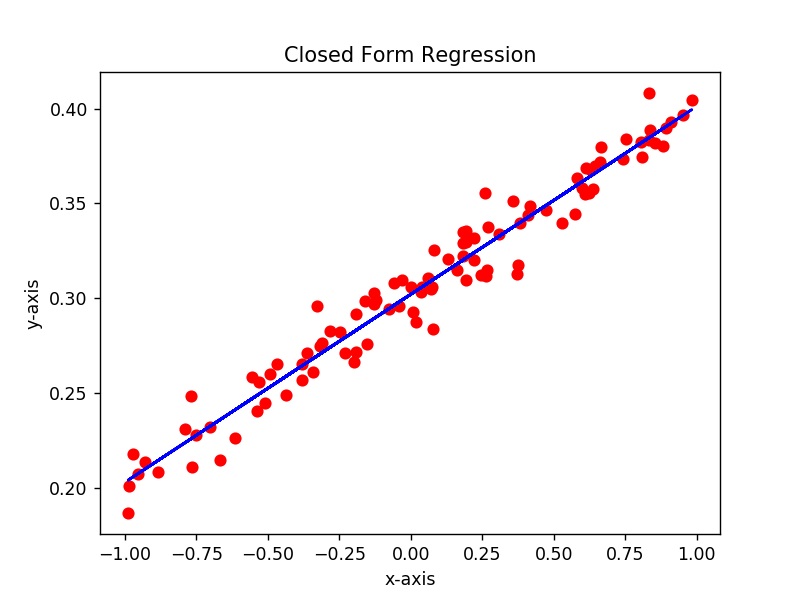

In [12]:
plt.figure(2)

y_regression = a * x_data + b

plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, y_regression, 'b')

plt.xlabel('x-axis')  
plt.ylabel('y-axis')
plt.title('Closed Form Regression')

plt.show()

### Tensorflow

In [13]:
import tensorflow as tf
a = tf.add(3,5)
print(a)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or 

Tensor("Add:0", shape=(), dtype=int32)


In [14]:
a = tf.add(3,5)
sess = tf.Session()
print(sess.run(a))
sess.close()

8


In [15]:
x = 2
y = 3
add_op = tf.add(x,y)
mul_op = tf.multiply(x,y)
useless = tf.multiply(x, add_op)
pow_op = tf.pow(add_op, mul_op)
with tf.Session() as sess:
    z, not_useless = sess.run([pow_op, useless])

In [16]:
# create variables with tf.get variable
s = tf.get_variable("scalar", initializer=tf.constant(2))
m = tf.get_variable("matrix", initializer=tf.constant([[0,1],[2,3]]))
W = tf.get_variable("big_matrix", shape=(784,10), initializer=tf.zeros_initializer())

In [17]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

In [18]:
a = tf.placeholder(tf.float32, shape=[3])

b = tf.constant([5,5,5], tf.float32)

c = a + b

with tf.Session() as sess:
    print(sess.run(c,{a:[1,2,3]}))

[6. 7. 8.]


### Linear Regression with Gradient Descent

In [20]:
import tensorflow as tf

# define constant
c = tf.constant(0)

# define variables (not initalized)
w = tf.Variable(tf.random_uniform([1],-0.1,0.1))
b = tf.Variable(tf.zeros([1]))

# define placeholder
x_data_placeholder = tf.placeholder('float32', shape=x_data.shape)
y_data_placeholder = tf.placeholder('float32', shape=y_data.shape)

# define loss function
y_regression = w * x_data_placeholder + b

loss = 

# define optimizer
train = tf.train.GradientDescentOptimizer(learning_rate=0.7).minimize(loss)

# initialize variables
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)  # run variable initializer : now you can use tensorflow variables

In [21]:
# see initial variables
my_feed_dict = {x_data_placeholder:x_data, y_data_placeholder:y_data}

initial_w, initial_b = sess.run([w,b], feed_dict=my_feed_dict)

print("Initial variables  w : {}, b : {}".format(initial_w, initial_b)) 

Initial variables  w : [-0.04985144], b : [0.]


<IPython.core.display.Javascript object>


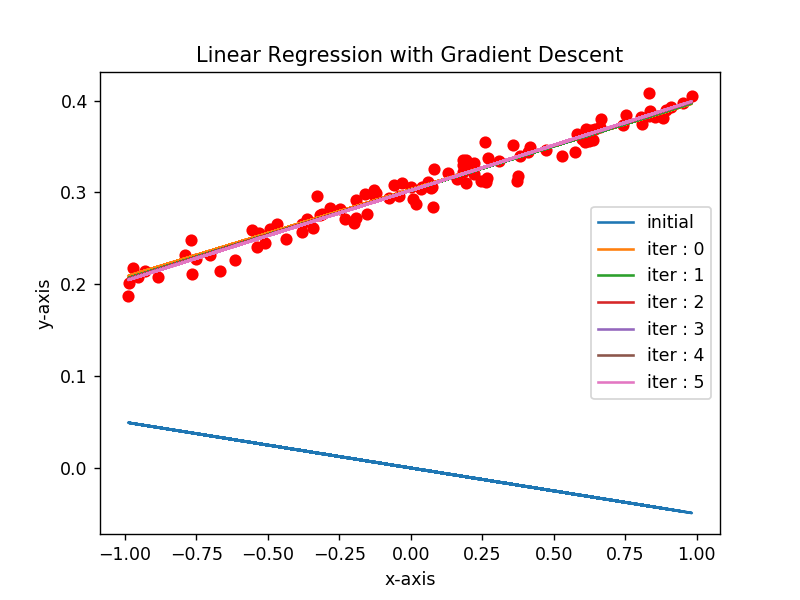

iteration : 0, w : [0.09507424], b : [0.30301756], loss : 0.00012070841330569237
iteration : 1, w : [0.09653968], b : [0.30206463], loss : 0.00011768259719246998
iteration : 2, w : [0.09751014], b : [0.30231813], loss : 0.00011660561722237617
iteration : 3, w : [0.09807573], b : [0.3021322], loss : 0.00011621083103818819
iteration : 4, w : [0.09843443], b : [0.30215728], loss : 0.00011606410407694057
iteration : 5, w : [0.09864946], b : [0.30211598], loss : 0.00011600924335652962


In [27]:
plt.figure(3)
plt.xlabel('x-axis')  
plt.ylabel('y-axis')
plt.title('Linear Regression with Gradient Descent')

plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, (initial_w * x_data + initial_b), label='initial')

# training step

for i in range():
    sess.run()  # train operator
    current_w, current_b, current_loss = sess.run()# variable and loss 
    print("iteration : {}, w : {}, b : {}, loss : {}".format(i,current_w, current_b, current_loss))
    
    # display
    plt.plot(x_data, (current_w * x_data + current_b), label='iter : {}'.format(i))
        
plt.legend()

plt.show()